The dataset is a report of sales of a restraurant. Create a class `RestaurantReport()` where you clean the data (if needed), and then create a function `show_report()` which when called, will print insights you find about the dataset.

Variable explanation -

`total_bill` - Total price of the bill of the customer.

`tip` - How much tip was left (this price is not included in the `total_bill`)

`sex` - Sex of the customer

`smoker` - Is customer a smoker (`yes`/`no`)

`day` - day when customer visited

`time` - time of the day when customer visited

`size` - number of items in the order


After you presnet all of this data (in a nice and readable format for the restaurant to see) answer following:

Restaurant would like to increase their profits and is asking you, in your opinion after the analysis, which groups of customers would you recommend to focus on, and during what days? (for example "smokers tip the most, they and have the largest meal sizes", "friday night leaves the most tips" etc...)

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv"


class RestaurantData():
    
    def __init__(self, url):
        self.load_df(url)

    def load_df(self, url):
        self.df= pd.read_csv(url)

    def info_test(self):
        self.df = df.info()

    def not_null(self):
        return self.df.isnull().sum()
        
    def orders_per_day(self):    
        return self.df["day"].value_counts(),self.df["day"].value_counts().sum()
    
    def big_orders_female(self):
        return self.df[(self.df["sex"] == "Female") & (self.df["size"] == 4)]    

    def sum_bills_tips(self):
        return self.df[["total_bill","tip"]].sum()    

    def tip_genre(self): 
        return self.df[["sex","tip"]].groupby("sex")["tip"].agg(["sum","mean", "count"])

    def total_bill_per_genre(self):
        return self.df[["sex","total_bill"]].groupby("sex")["total_bill"].agg(["sum","mean", "count"])
           

    def genre_smoker(self):
        return self.df.groupby("sex")["smoker"].value_counts() 

    def smoker_tips(self):
        return self.df[["total_bill","tip","size","smoker"]].groupby("smoker").mean()

    def data_per_time_of_day(self):
        total_bill_agg =self.df[["total_bill","tip","size","time"]].groupby("time")["total_bill"].agg(["sum","mean", "count"])
        tip_agg =self.df[["total_bill","tip","size","time"]].groupby("time")["tip"].agg(["sum","mean", "count"])
        return pd.merge(total_bill_agg, tip_agg, left_index=True, right_index=True, suffixes=('_total_bill', '_tip'))
    
    def data_per_day(self):
        total_bill_agg =self.df[["total_bill","tip","size","day"]].groupby("day")["total_bill"].agg(["sum","mean", "count"])
        tip_agg =self.df[["total_bill","tip","size","day"]].groupby("day")["tip"].agg(["sum","mean", "count"])
        return pd.merge(total_bill_agg, tip_agg, left_index=True, right_index=True, suffixes=('_total_bill', '_tip'))
    
    def count_per_genre(self):
        return self.df["sex"].value_counts()


    def servers(self):
        server_lunch_capacity = 8
        server_dinner_capacity = 6
        grouped = self.df.groupby(["day", "time"])["total_bill"].count()
        data = pd.DataFrame(grouped)
        result.reset_index(inplace=True)
        result.rename({"total_bill": "number_of_customers"},axis= 1,inplace= True)
        result["servers"] = result.apply(self.apply_pandas_number_of_servers, axis=1)
        return result

    def apply_pandas_number_of_servers(self, row):
        if row["time"] == "Dinner":
            servers = row["number_of_customers"]/server_dinner_capacity
        else:
            servers = row["number_of_customers"]/server_lunch_capacity    

        return np.ceil(servers) 



test = RestaurantData(url)

test.sum_bills_tips() # 1, 2

#test.count_per_genre()  # 3
#test.total_bill_per_genre() # 4
#test.tip_genre() # 5
#test.genre_smoker() # 6
#test.smoker_tips() # 7, 8
#test.data_per_day() # 9, 10
#test.data_per_time_of_day() # 11, 12
#test.orders_per_day()
#test.big_orders_female()
#test.servers()

total_bill    4827.77
tip            731.58
dtype: float64

# GRAPHS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = test.df

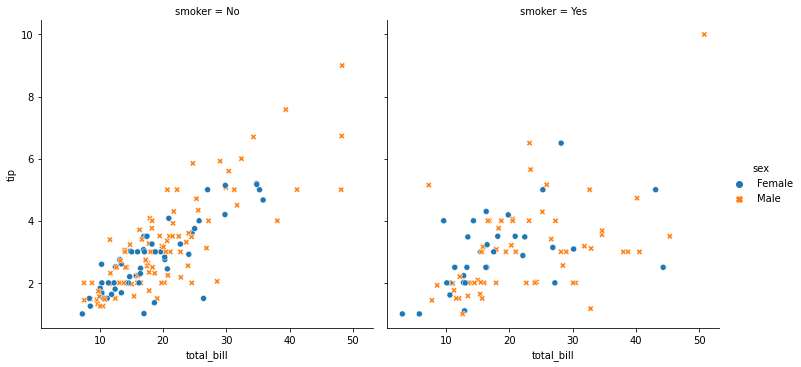

In [ ]:
sns.relplot(data=df, 
            x="total_bill", 
            y="tip",
            hue="sex",
            style="sex",
            col="smoker",
            )

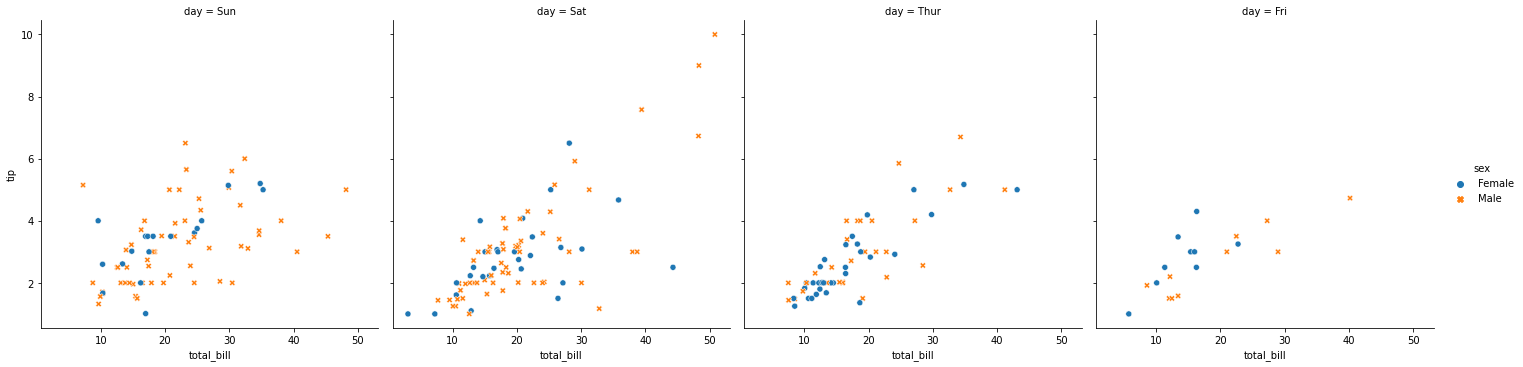

In [ ]:
sns.relplot(data=df, 
            x="total_bill", 
            y="tip",
            hue="sex",
            style="sex",
            col="day",
            #order=["Thur", "Fri", "Sat", "Sun"]
            )

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

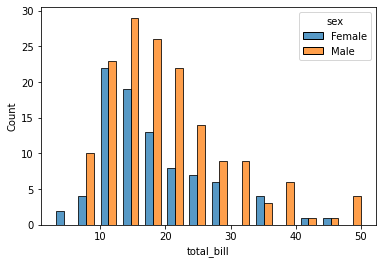

In [ ]:
sns.histplot(data = df,
            x="total_bill", 
            hue="sex",
            multiple="dodge",
            shrink=0.7,)

<AxesSubplot:xlabel='sex', ylabel='tip'>

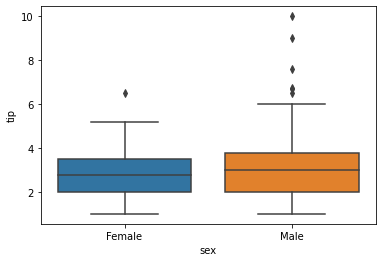

In [ ]:
sns.boxplot(data=df,
            x="sex", 
            y="tip")

<Figure size 1152x576 with 0 Axes>

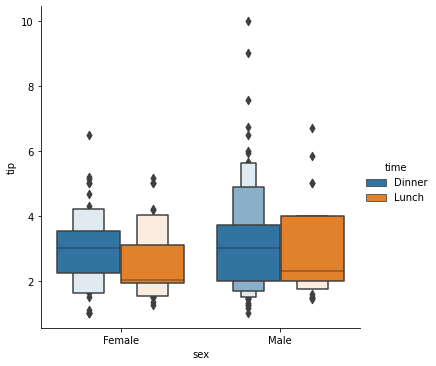

In [ ]:
plt.figure(figsize=(16,8))
sns.catplot(data=df,
            x="sex", 
            y="tip",
            hue="time",
            kind="boxen")

<AxesSubplot:xlabel='day', ylabel='tip'>

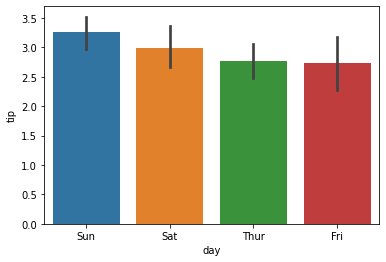

In [ ]:
sns.barplot(data=df,
            x="day",
            y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

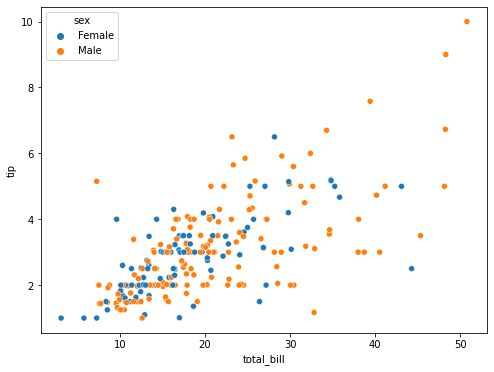

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,
                x="total_bill",
                y="tip",
                hue="sex")

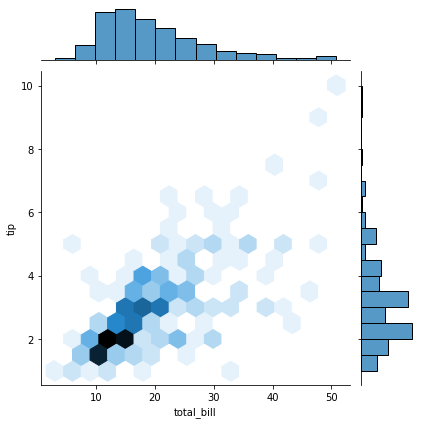

In [ ]:
sns.jointplot(data=df,
            x="total_bill",
            y="tip",
            kind="hex")

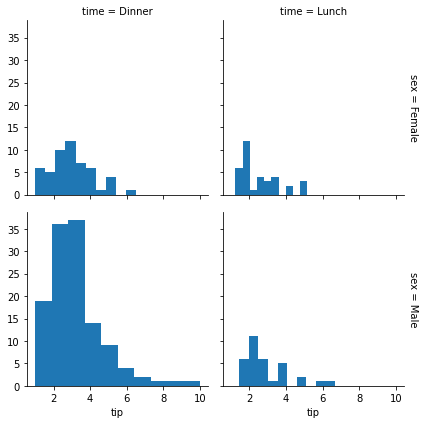

In [ ]:
grid = sns.FacetGrid(data=df, 
                    row="sex", 
                    col="time", 
                    margin_titles=True)

grid.map(plt.hist, "tip") #, bins=np.linspace(0, 40, 15)

<Figure size 576x432 with 0 Axes>

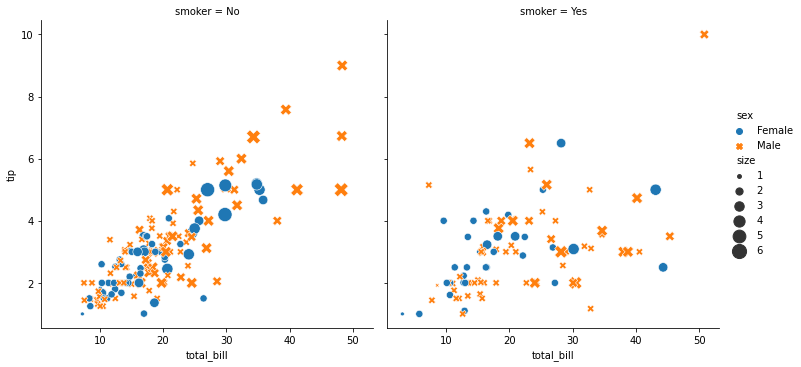

In [ ]:
plt.figure(figsize=(8,6))

sns.relplot(data=df,
                x="total_bill",
                y="tip",
                col="smoker",
                hue="sex",
                style="sex",
                size="size",
                sizes=(15,200))

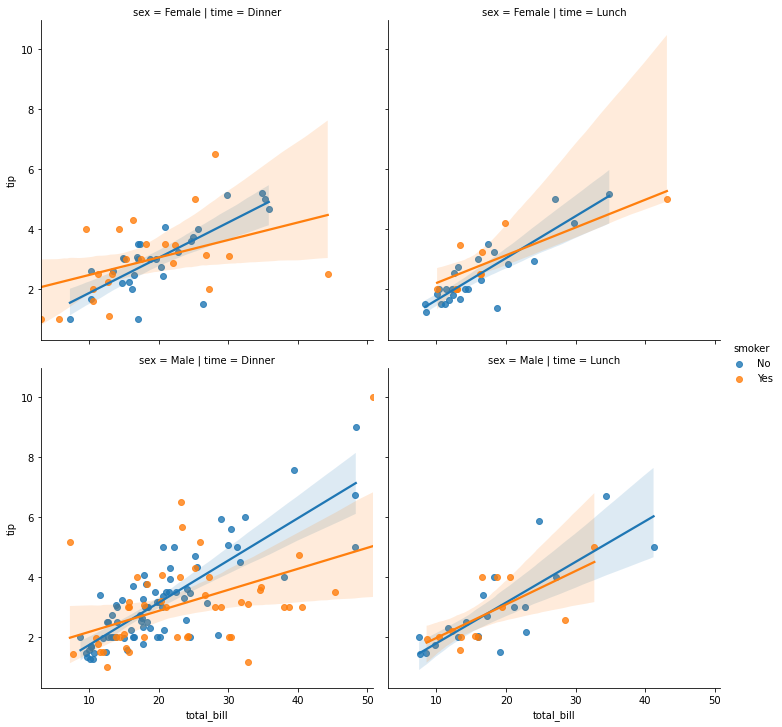

In [ ]:
sns.lmplot(data=df,
            x="total_bill",
            y="tip",
            hue="smoker",
            col="time",
            row="sex"
            )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>